# <u> Grids.

***Grids are general types of plots that allows us to map plot types to rows and columns of a grid***, this helps us create similar plots or automate subplots separated by features.

---

# <u>Imports.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---

# <u>Data to plot</u>

***(Upload the iris Dataset/DataFrame).***

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- <u> NOTE:

    This Dataset / DataFrame is basically just measurements of a bunch of different flowers or irises.

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

- <u> NOTE:

    - We can see that the species column has 3 distinct values.
    - And the other four columns are just features of the flower (sepal_length, sepal_width etc).

---

# pairplot

Let's do a pairplot for the iris dataset. Note that we learnt about pairplots in Distribution plots.

pairplot is a simpler version of PairGrid (we'll use quite often):

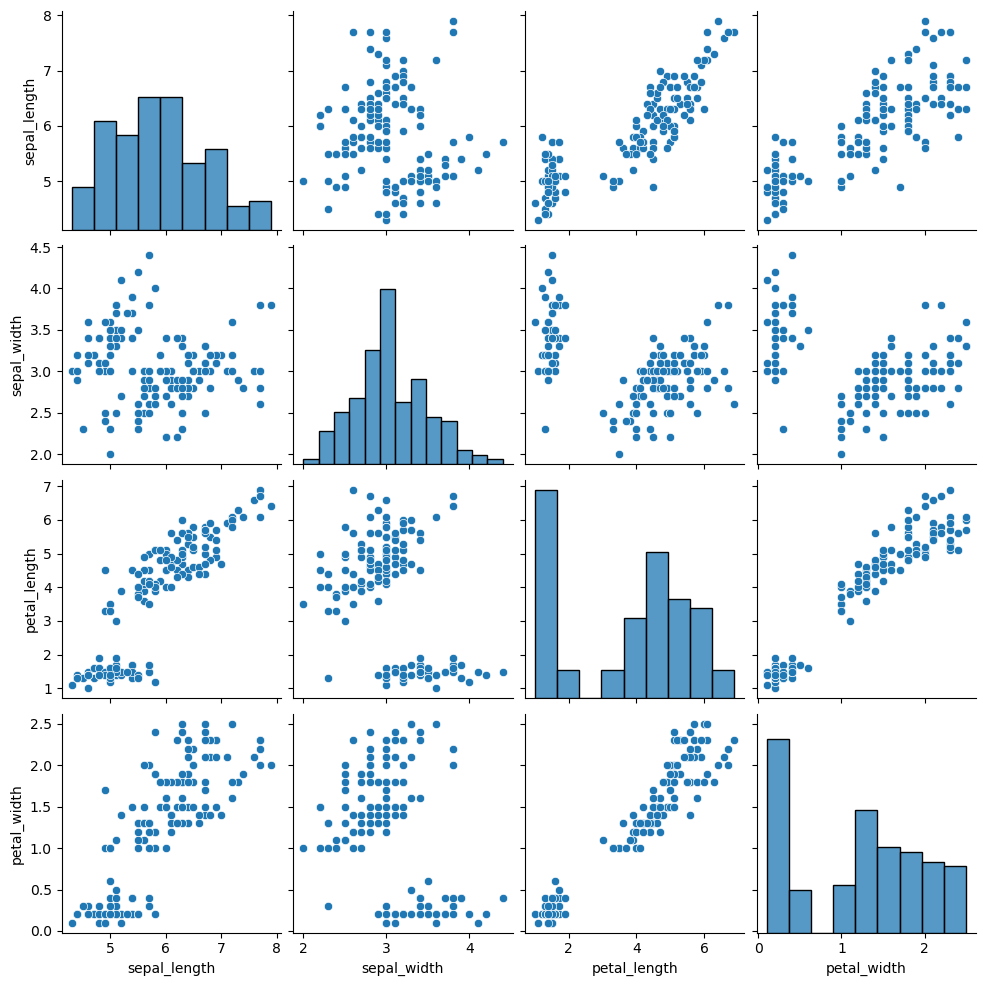

In [5]:
sns.pairplot(iris)

plt.show()

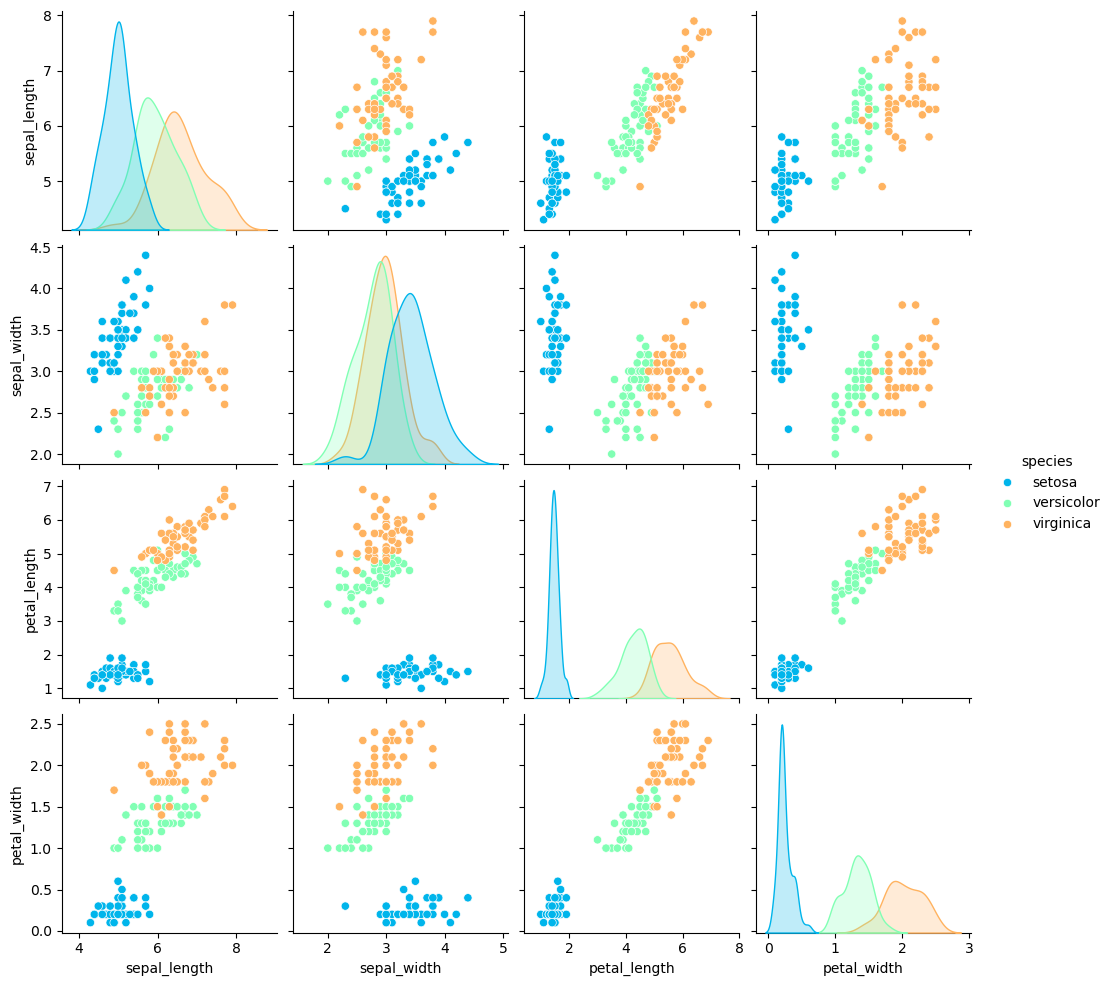

In [6]:
sns.pairplot(iris, hue = 'species', palette = 'rainbow')

plt.show()

- <u>NOTE:

    A PairGrid will allow us to customize this sort of pairplot a lot more.

---

# <u> PairGrid

***PairGrid is a subplot grid for plotting pairwise relationships in a dataset.***

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### ***Step 1: Create a PairGrid object:***

Creates an empty PairGrid. It takes all the numerical columns and grids them up essentially kind of making the subplots for us.

- ***Syntax: var_name = sns.PairGrid(df)***

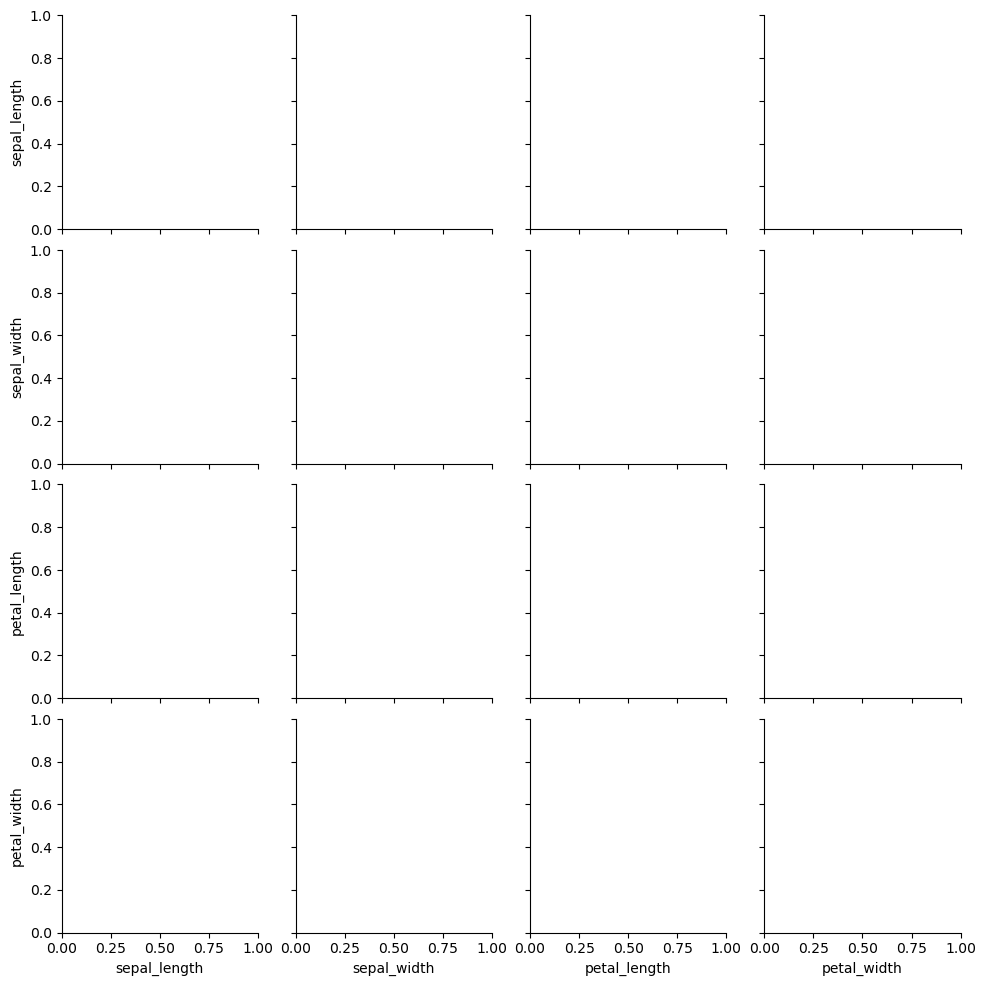

In [8]:
# Just the Grid

g = sns.PairGrid(iris)

plt.show()

### ***Step 2: Map plot types to the grid.***

- ***var_name.map(func): Plots with the same function in every subplot.***

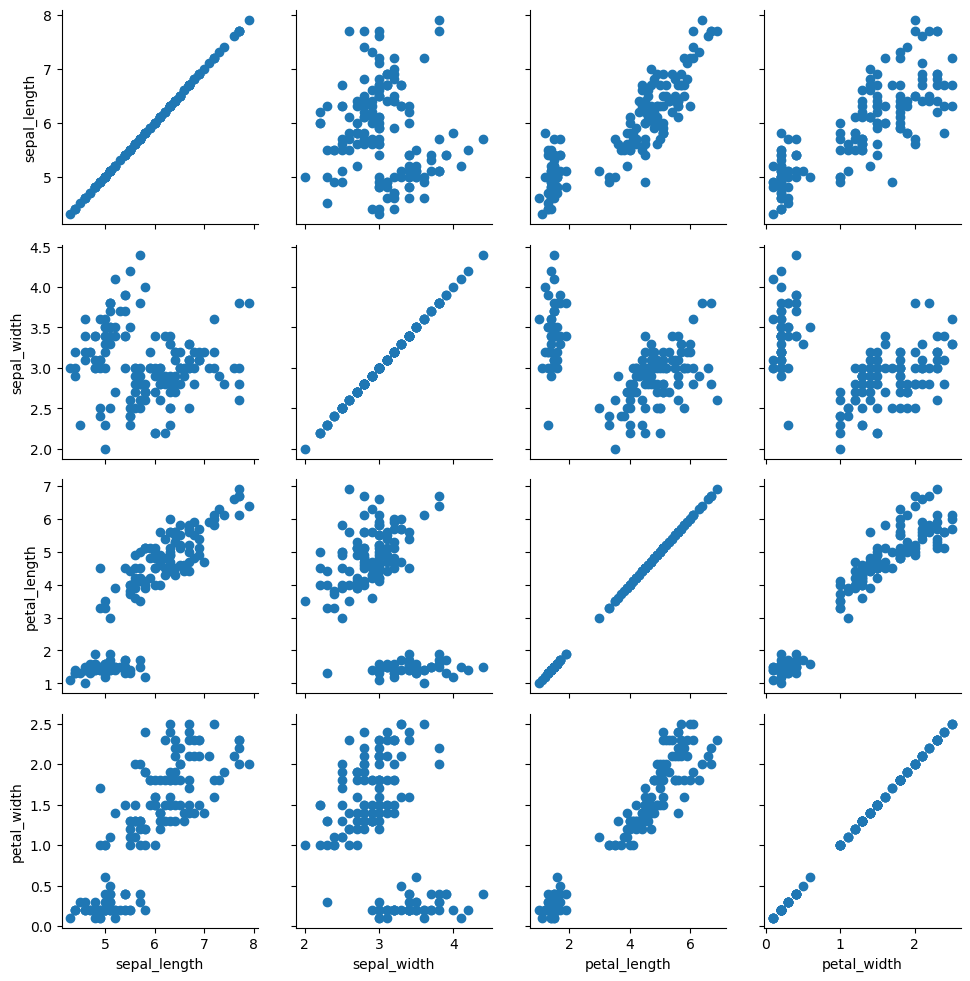

In [9]:
# Then you map to the grid

g = sns.PairGrid(iris)

g.map(plt.scatter)

plt.show()

- <u>NOTE:

    And notice in plt.scatter, we're not using the () and just passing in the plot function.

- ***var_name.map_diag(func): Plots with a univariate function on each diagonal subplot.***

- ***var_name.map_upper(func): Plots with a bivariate function on the upper diagonal subplots.***

- ***var_name.map_lower(func): Plots with a bivariate function on the lower diagonal subplots.***

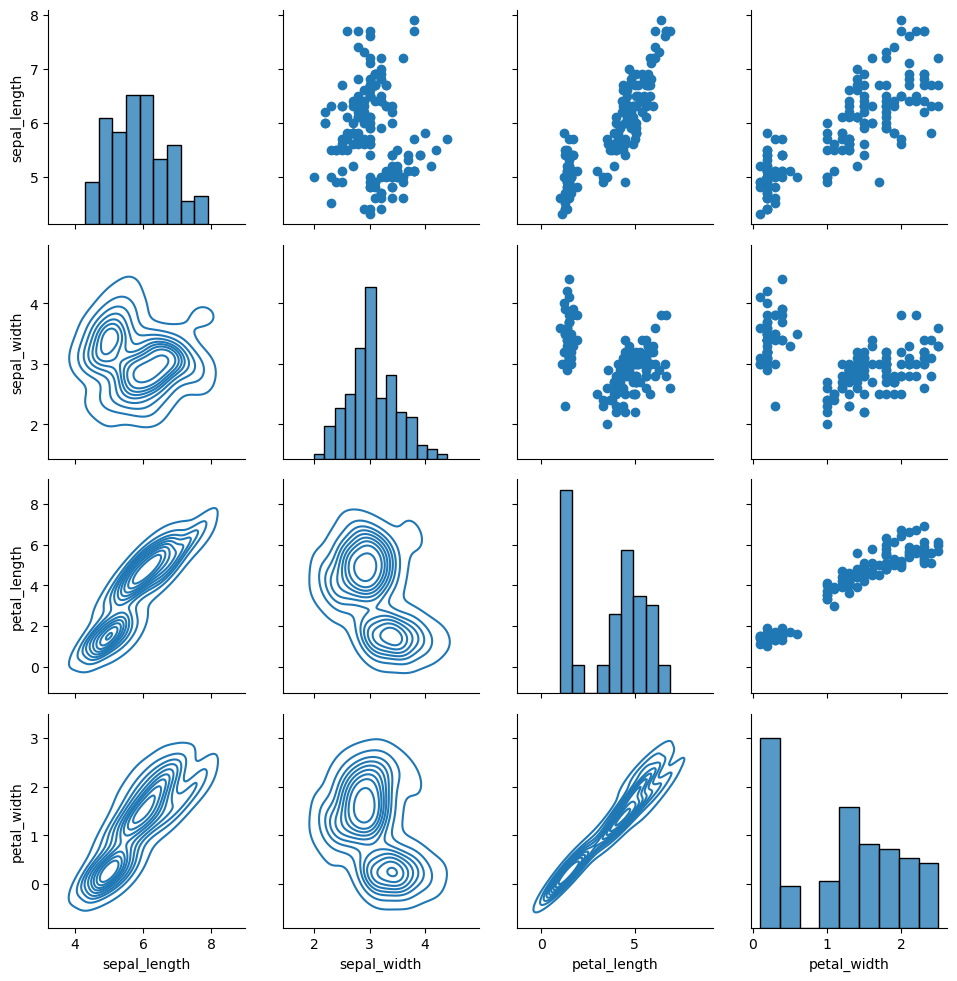

In [10]:
# Map to upper,lower, and diagonal.

g = sns.PairGrid(iris)

g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

plt.show()

---

# <u>Facet Grid.

***FacetGrid is the general way to create grids of plots based off of a feature:***

### New Dataset(tips):

In [11]:
tips = sns.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [14]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

### ***Step 1: Create a FacetGrid object.***

Creates an empty FacetGrid.

***Syntax: var_name = sns.FacetGrid(data = df, col = 'col_name', row = 'col_name', hue = 'categorical_col_name')***

                        where;
                            - df stands for DataFrame
                            - row and col arguments are kind of similar to nrows and ncols arguments in subplots method of Matplotlib, 
                            except now instead of specifying numbers we're actually going to pass in column names of our DataFrame.

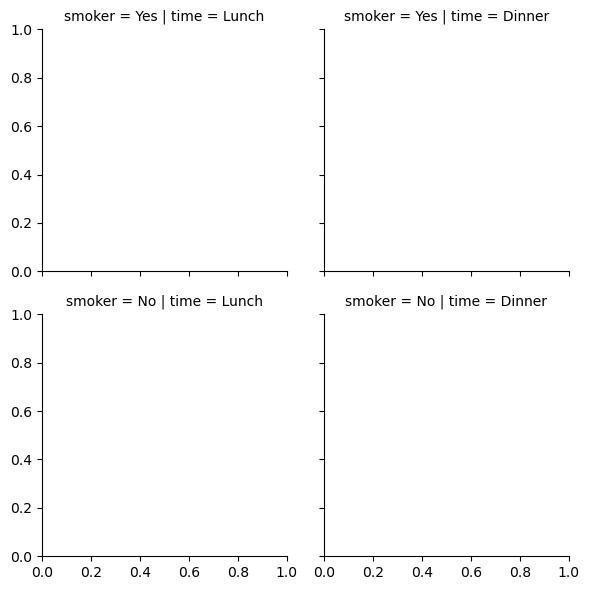

In [15]:
# Just the Grid

g = sns.FacetGrid(tips, col = 'time', row = 'smoker')

plt.show()

- <u>NOTE:

    - Notice we have 4 empty subplots.
    - We specified col = 'time'. Since the time column contains 2 unique values (Dinner and Lunch), the grid is divided into 2 columns, one for each value.
    - We specified row = 'smoker'. Since the smoker column also contains 2 unique values (Yes and No), the grid is divided into 2 rows, one for each value.

### ***Step 2: Map plot types to the grid:***

- ***var_name.map(func, 'numeric_col_name') : For Univariate plots(plots that require only one variable) such as sns.histplot***

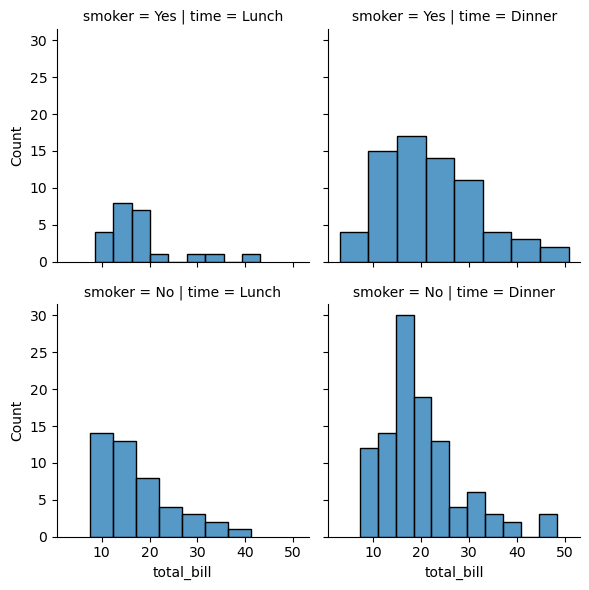

In [16]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker')

g.map(sns.histplot, 'total_bill')

plt.show()

- <u>NOTE:

    - g.map(sns.histplot, 'total_bill')
    - We are mapping a plot type (sns.histplot) and separating the results based off the column and row and they are clearly labeled for us.

- ***var_name.map(func, 'numeric_col_name1', numeric_col_name2) : For Bivariate plots(plots that require 2 variable) such as plt.scatter***

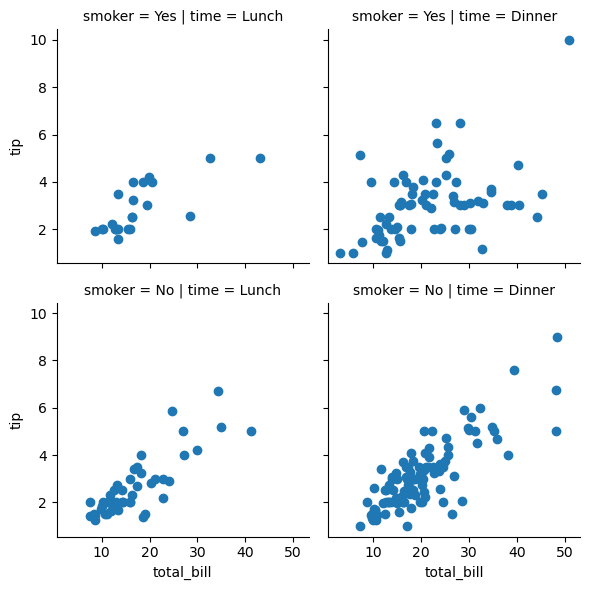

In [17]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker')

g.map(plt.scatter, 'total_bill', 'tip')

plt.show()

***We can also define hue argument:***

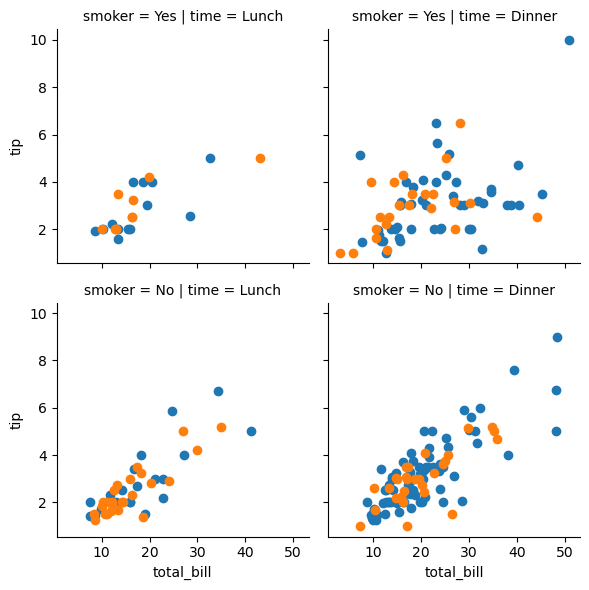

In [18]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex')

g.map(plt.scatter, 'total_bill', 'tip')

plt.show()

***To add legend for hue argument column values:***

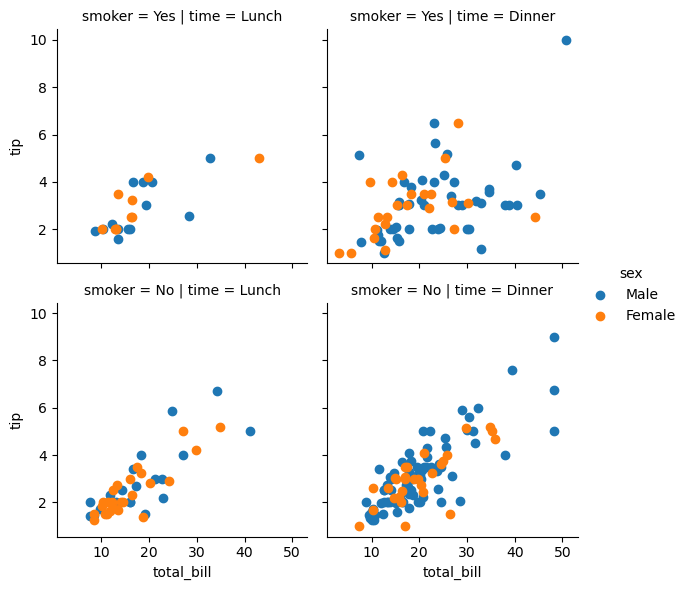

In [19]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker', hue = 'sex')

g.map(plt.scatter, 'total_bill', 'tip').add_legend()

plt.show()

---

# <u>JointGrid

***JointGrid is the general version for jointplot() type grids, for a quick example:***

***jointplot() Syntax: sns.jointplot(x = 'col_name', y = 'col_name2', data = DataFrame, kind)***


## ***JointGrid:***

### ***Step 1: Create a JointGrid object.***

***Syntax: var_name = sns.JointGrid(x = 'col_name', y = 'col_name2', data = DataFrame)***

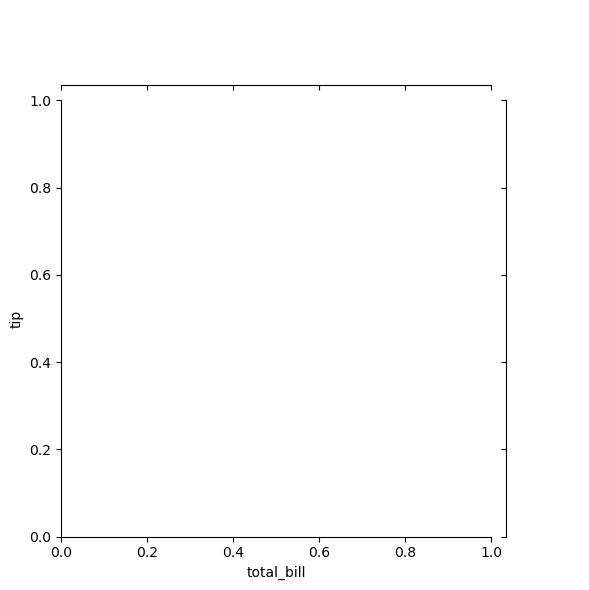

In [20]:
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)

plt.show()

### ***Step 2: Map plot types to the grid:***

***Syntax: var_name.plot(joint_func, marginal_func)***

            where;
                joint_func, marginal_func : callables
                Functions to draw the bivariate and univariate plots respectively.

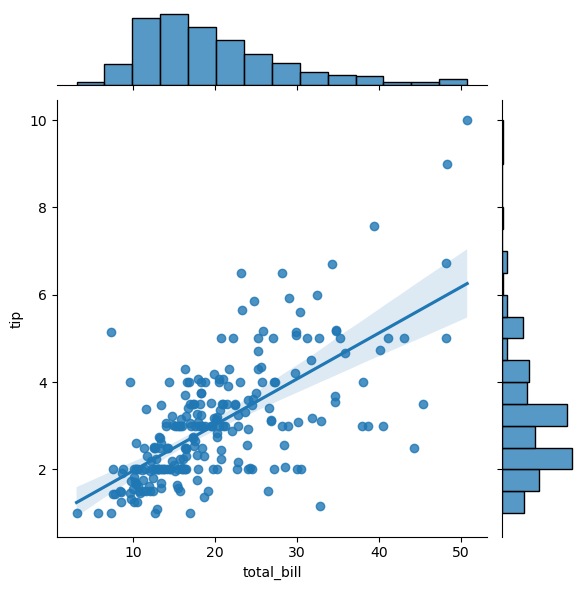

In [21]:
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)

g.plot(sns.regplot, sns.histplot)

plt.show()

***Use jointplot() over JointGrid() method.***

---

Reference the documentation as necessary for grid types, but most of the time we'll just use the plots discussed earlier.

---